<a href="https://colab.research.google.com/github/ramonferrari/mpgc_ti/blob/main/DAV_S2023_C%C3%B3digos_Pr%C3%A9_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis & Visualization
## Professores Eduardo Francisco e Plínio Júnior
#### Grupo:
1. Felipe Nunes Barroso
2. Lucas Felipe Ballesteros Martins
3. Ramon Moreno Ferrari
4. Vagner Almeida Lima




### Preparação: instala e carrega pacotes necessários

In [1]:
install.packages("ggplot2")
install.packages("dplyr")
install.packages("showtext")
install.packages("reshape")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
suppressWarnings(suppressMessages(library(ggplot2)))
suppressWarnings(suppressMessages(library(showtext)))
suppressWarnings(suppressMessages(library(dplyr)))
suppressWarnings(suppressMessages(library(reshape)))

In [3]:
# Fonte bonita para gráficos
font_add_google("Merriweather Sans", "merri")

## Exploração da base



In [4]:
# Endereço do arquivo na nuvem, para funcionar para todos os colegas, em qualquer computador
url_dataset <- c("https://raw.githubusercontent.com/ramonferrari/mpgc_ti/main/sustainable_development_report_2023.csv")
# Leitura dos dados
df <- read.table(url_dataset,header=TRUE,sep=",")

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”
Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“number of items read is not a multiple of the number of columns”


In [5]:
df_round <- df %>% mutate(across(where(is.numeric), round, 2))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(where(is.numeric), round, 2)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


In [6]:
head(df_round)

,country_code,country,region,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,⋯,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,FIN,Finland,OECD,86.76,99.58,60.89,95.39,97.17,92.11,94.33,⋯,86.79,96.00,98.47,91.23,60.06,68.79,87.93,85.07,92.52,75.60
2,SWE,Sweden,OECD,85.98,98.89,63.07,96.90,99.76,91.44,95.06,⋯,84.97,97.59,94.97,90.39,56.83,70.03,69.35,80.19,88.51,85.77
3,DNK,Denmark,OECD,85.68,99.22,71.03,95.40,99.34,87.00,90.73,⋯,87.56,96.98,98.16,93.04,44.57,60.78,76.30,92.79,93.84,82.15
4,DEU,Germany,OECD,83.36,99.51,72.37,93.04,97.16,81.92,88.44,⋯,86.97,95.79,88.15,90.10,55.41,64.00,74.00,79.23,89.46,84.39
5,AUT,Austria,OECD,82.28,99.45,73.07,92.47,97.91,84.58,92.16,⋯,83.27,96.98,94.63,92.47,49.62,57.33,NA,73.58,87.91,71.13
6,FRA,France,OECD,82.05,99.73,72.39,93.22,99.63,87.82,89.27,⋯,85.31,92.78,87.47,90.53,60.52,73.83,65.68,68.82,76.09,73.11


In [7]:
summary(df)

 country_code         country             region          overall_score  
 Length:120         Length:120         Length:120         Min.   :62.73  
 Class :character   Class :character   Class :character   1st Qu.:68.71  
 Mode  :character   Mode  :character   Mode  :character   Median :72.47  
                                                          Mean   :72.87  
                                                          3rd Qu.:78.14  
                                                          Max.   :86.76  
                                                          NA's   :1      
  goal_1_score     goal_2_score    goal_3_score    goal_4_score  
 Min.   : 19.74   Min.   :44.60   Min.   :49.89   Min.   :59.11  
 1st Qu.: 90.10   1st Qu.:57.72   1st Qu.:74.30   1st Qu.:81.88  
 Median : 98.59   Median :63.80   Median :80.58   Median :92.33  
 Mean   : 92.26   Mean   :63.15   Mean   :80.14   Mean   :88.19  
 3rd Qu.: 99.39   3rd Qu.:68.59   3rd Qu.:89.09   3rd Qu.:97.44  
 Max.   :100

In [8]:
na.omit(df) %>% summary()

 country_code         country             region          overall_score  
 Length:78          Length:78          Length:78          Min.   :62.73  
 Class :character   Class :character   Class :character   1st Qu.:69.75  
 Mode  :character   Mode  :character   Mode  :character   Median :73.53  
                                                          Mean   :73.80  
                                                          3rd Qu.:78.46  
                                                          Max.   :86.76  
  goal_1_score     goal_2_score    goal_3_score    goal_4_score  
 Min.   : 19.74   Min.   :44.60   Min.   :49.89   Min.   :59.11  
 1st Qu.: 89.74   1st Qu.:57.05   1st Qu.:75.29   1st Qu.:83.55  
 Median : 98.59   Median :64.16   Median :80.92   Median :93.94  
 Mean   : 92.44   Mean   :63.15   Mean   :81.46   Mean   :89.86  
 3rd Qu.: 99.39   3rd Qu.:68.65   3rd Qu.:91.84   3rd Qu.:97.95  
 Max.   :100.00   Max.   :83.40   Max.   :97.12   Max.   :99.76  
  goal_5_score    go

In [9]:
# Deixa variáveis com nomes bonitinhos porque temos TOC
names(df)<-c("Código de país","País","Região","Escore geral","Goal01 - Sem pobreza","Goal02 - Zero fome","Goal03 - Saúde e bem estar","Goal04 - Qualidade da educação","Goal05 - Igualdade de gênero","Goal06 - Água limpa e sanitização","Goal07 - Energia limpa e acessível","Goal08 - Trabalho decente e crescimento econômico","Goal09 - Indústria, Inovação e Infraestrutura","Goal10 - Redução de desigualdades","Goal11 - Cidades e comunidades sustentáveis","Goal12 - Consumo e produção responsáveis","Goal13 - Ações climáticas","Goal14 - Vida subaquática","Goal15 - Vida terrestre","Goal16 - Paz, justiça e instituições fortes","Goal17 - Parcerias pelos objetivos")
names(df)

[1] "Código de país"                                   
 [2] "País"                                             
 [3] "Região"                                           
 [4] "Escore geral"                                     
 [5] "Goal01 - Sem pobreza"                             
 [6] "Goal02 - Zero fome"                               
 [7] "Goal03 - Saúde e bem estar"                       
 [8] "Goal04 - Qualidade da educação"                   
 [9] "Goal05 - Igualdade de gênero"                     
[10] "Goal06 - Água limpa e sanitização"                
[11] "Goal07 - Energia limpa e acessível"               
[12] "Goal08 - Trabalho decente e crescimento econômico"
[13] "Goal09 - Indústria, Inovação e Infraestrutura"    
[14] "Goal10 - Redução de desigualdades"                
[15] "Goal11 - Cidades e comunidades sustentáveis"      
[16] "Goal12 - Consumo e produção responsáveis"         
[17] "Goal13 - Ações climáticas"                        
[18] "Goal14 - Vida subaquática"                        
[19] "Goal15 - Vida terrestre"                          
[20] "Goal16 - Paz, justiça e instituições fortes"      
[21] "Goal17 - Parcerias pelos objetivos"

In [22]:
melt_df <- melt(df, id = c("Código de país","País","Região"))
melt_df<-na.omit(melt_df)
head(melt_df)

melt_df$variable <- factor(melt_df$variable, levels=c("Escore geral","Goal01 - Sem pobreza","Goal02 - Zero fome","Goal03 - Saúde e bem estar","Goal04 - Qualidade da educação","Goal05 - Igualdade de gênero","Goal06 - Água limpa e sanitização","Goal07 - Energia limpa e acessível","Goal08 - Trabalho decente e crescimento econômico","Goal09 - Indústria, Inovação e Infraestrutura","Goal10 - Redução de desigualdades","Goal11 - Cidades e comunidades sustentáveis","Goal12 - Consumo e produção responsáveis","Goal13 - Ações climáticas","Goal14 - Vida subaquática","Goal15 - Vida terrestre","Goal16 - Paz, justiça e instituições fortes","Goal17 - Parcerias pelos objetivos"))

,Código de país,País,Região,variable,value
,<chr>,<chr>,<chr>,<fct>,<dbl>
1,FIN,Finland,OECD,Escore geral,86.76059
2,SWE,Sweden,OECD,Escore geral,85.98140
3,DNK,Denmark,OECD,Escore geral,85.68364
4,DEU,Germany,OECD,Escore geral,83.35845
5,AUT,Austria,OECD,Escore geral,82.28019
6,FRA,France,OECD,Escore geral,82.04834


png 
  2

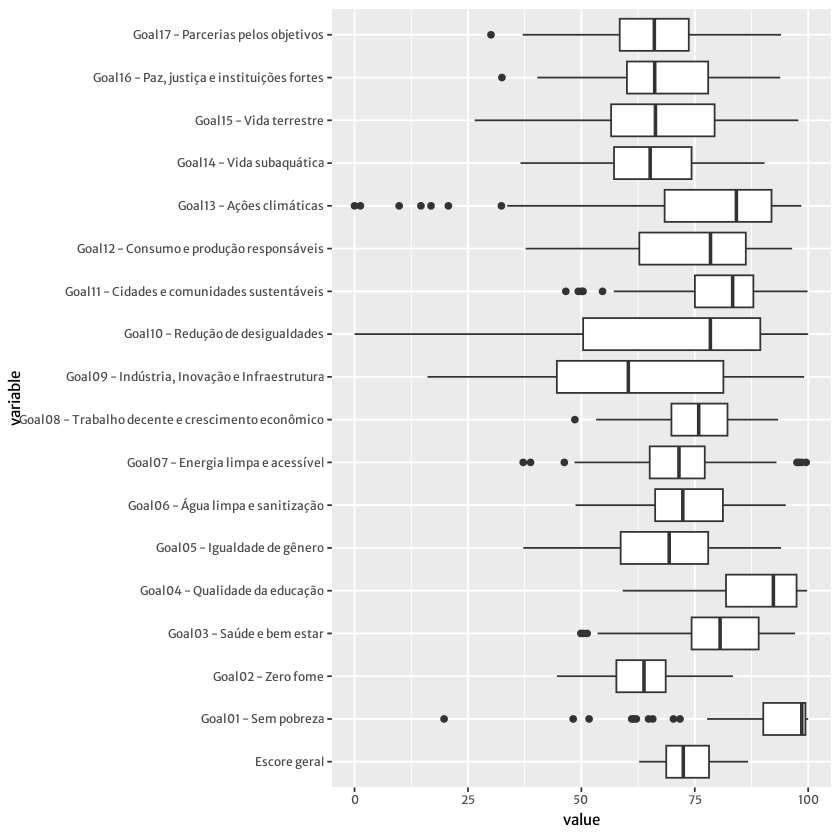

In [28]:
# Mostra o boxplot de todas as variáveis

pdf("boxplot.pdf", width = 13, height = 9)
showtext_auto()
ggplot(melt_df, aes(x = variable, y = value)) +  # ggplot function
    geom_boxplot() +  coord_flip() + theme(plot.title = element_text(size=12),text=element_text(family="merri"))
dev.off()
ggplot(melt_df, aes(x = variable, y = value)) +  # ggplot function
    geom_boxplot() +  coord_flip() + theme(plot.title = element_text(size=12),text=element_text(family="merri"))

In [24]:
# Calcula ainda a média e desvio-padrão
melt_df %>% group_by(variable) %>%  summarise_at(vars(starts_with("val")), list(mean=mean, sd=sd))

variable,mean,sd
<fct>,<dbl>,<dbl>
Escore geral,72.86714,6.053513
Goal01 - Sem pobreza,92.25624,13.190414
Goal02 - Zero fome,63.14537,7.714222
Goal03 - Saúde e bem estar,80.13530,11.483440
Goal04 - Qualidade da educação,88.18568,11.232696
Goal05 - Igualdade de gênero,68.44511,13.743269
Goal06 - Água limpa e sanitização,72.78071,11.063456
Goal07 - Energia limpa e acessível,71.62729,10.980987
Goal08 - Trabalho decente e crescimento econômico,75.42835,8.672081
